In [31]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\KUMAR HIREMATH\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [32]:
from tensorflow.keras.layers import Input,Lambda,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [33]:
import os

In [34]:
IMAGE_SIZE=[224,224]
train_path=os.listdir('C:\\Users\\KUMAR HIREMATH\\Downloads\\data\\train')
valid_path=os.listdir('C:\\Users\\KUMAR HIREMATH\\Downloads\\data\\test')

In [35]:
resnet=ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [36]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [37]:
for layer in resnet.layers:
    layer.trainable=False

In [38]:
folders=glob('C:\\Users\\KUMAR HIREMATH\\Downloads\\data\\train\\*')

In [39]:
folders

['C:\\Users\\KUMAR HIREMATH\\Downloads\\data\\train\\diseased cotton leaf',
 'C:\\Users\\KUMAR HIREMATH\\Downloads\\data\\train\\diseased cotton plant',
 'C:\\Users\\KUMAR HIREMATH\\Downloads\\data\\train\\fresh cotton leaf',
 'C:\\Users\\KUMAR HIREMATH\\Downloads\\data\\train\\fresh cotton plant']

In [40]:
len(folders)

4

In [41]:
x=Flatten()(resnet.output)

In [42]:
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=resnet.input,outputs=prediction)

In [43]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [44]:
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [45]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [46]:
train_set=train_datagen.flow_from_directory('C:\\Users\\KUMAR HIREMATH\\Downloads\\data\\train',
                                           batch_size=32,
                                           target_size=(224,224),
                                           class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [47]:
test_set=test_datagen.flow_from_directory('C:\\Users\\KUMAR HIREMATH\\Downloads\\data\\test',
                                         batch_size=32,
                                         target_size=(224,224),
                                         class_mode='categorical')

Found 18 images belonging to 4 classes.


In [48]:
r=model.fit(
train_set,
validation_data=test_set,
epochs=20,
steps_per_epoch=len(train_set),
validation_steps=len(test_set))

Epoch 1/20
61/61 [==============================] - 206s 3s/step - loss: 5.4479 - accuracy: 0.3260 - val_loss: 1.4363 - val_accuracy: 0.5000
Epoch 2/20
61/61 [==============================] - 203s 3s/step - loss: 1.3482 - accuracy: 0.5074 - val_loss: 0.9746 - val_accuracy: 0.7222
Epoch 3/20
61/61 [==============================] - 194s 3s/step - loss: 0.8968 - accuracy: 0.6437 - val_loss: 0.7788 - val_accuracy: 0.6667
Epoch 4/20
61/61 [==============================] - 192s 3s/step - loss: 0.8911 - accuracy: 0.6610 - val_loss: 0.7357 - val_accuracy: 0.6667
Epoch 5/20
61/61 [==============================] - 190s 3s/step - loss: 0.8397 - accuracy: 0.6672 - val_loss: 1.3659 - val_accuracy: 0.7222
Epoch 6/20
61/61 [==============================] - 197s 3s/step - loss: 0.9135 - accuracy: 0.6589 - val_loss: 0.7800 - val_accuracy: 0.7222
Epoch 7/20
61/61 [==============================] - 196s 3s/step - loss: 0.7593 - accuracy: 0.6906 - val_loss: 0.6724 - val_accuracy: 0.6111
Epoch 8/20
61

In [51]:
r.history

{'loss': [3.4599661827087402,
  1.2395761013031006,
  0.8954587578773499,
  0.8716292977333069,
  0.8251564502716064,
  0.8310897946357727,
  0.757811963558197,
  0.7716692090034485,
  0.797029435634613,
  0.8769728541374207,
  0.7239359021186829,
  0.6845661401748657,
  0.8118947744369507,
  0.7154009938240051,
  0.632705807685852,
  0.736274242401123,
  0.6650454998016357,
  0.8567453622817993,
  0.6772515773773193,
  0.6772423982620239],
 'accuracy': [0.3874935805797577,
  0.5330599546432495,
  0.6494105458259583,
  0.6473603248596191,
  0.6632496118545532,
  0.6781137585639954,
  0.6981035470962524,
  0.6852896213531494,
  0.6873398423194885,
  0.671963095664978,
  0.7211686372756958,
  0.7365453839302063,
  0.7237313985824585,
  0.7278319001197815,
  0.7508969902992249,
  0.7268067598342896,
  0.7447462677955627,
  0.7042542099952698,
  0.7498718500137329,
  0.7437211871147156],
 'val_loss': [1.4363083839416504,
  0.974567174911499,
  0.7787753343582153,
  0.7357352375984192,
  1.

In [52]:
import matplotlib.pyplot as plt

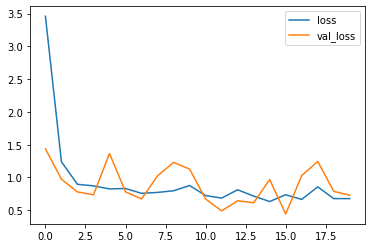

In [53]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

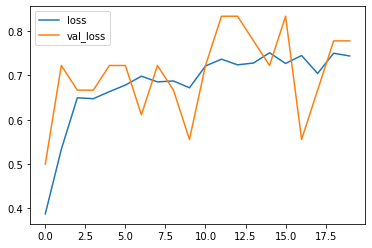

In [54]:
plt.plot(r.history['accuracy'],label='loss')
plt.plot(r.history['val_accuracy'],label='val_loss')
plt.legend()
plt.show()